In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency, TProfile2D
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/JetValidation/analysis/mc_calibration

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/JetValidation/analysis/mc_calibration


In [4]:
f2 = ROOT.TFile.Open("jet_pt_unfolding.root")
h_truth = f2.Get("hTruthPT")
h_reco = f2.Get("hRecoPT")
h_meas = f2.Get("hMeasPT")
h_truth.SetDirectory(0)
h_reco.SetDirectory(0)
h_meas.SetDirectory(0)
h1_truth = f2.Get("hTruthPTHalf")
h1_reco = f2.Get("hRecoPTHalf")
h1_meas = f2.Get("hMeasPTHalf")
h1_truth.SetDirectory(0)
h1_reco.SetDirectory(0)
h1_meas.SetDirectory(0)
h_jes = f2.Get("jes_ratio")
h_jes.SetDirectory(0)
h2_truth = f2.Get("hInverseTruthPT")
h2_reco = f2.Get("hInverseRecoPT")
h2_meas = f2.Get("hInverseMeasPT")
h2_truth.SetDirectory(0)
h2_reco.SetDirectory(0)
h2_meas.SetDirectory(0)
h3_truth = f2.Get("hInverseTruthPTHalf")
h3_reco = f2.Get("hInverseRecoPTHalf")
h3_meas = f2.Get("hInverseMeasPTHalf")
h3_truth.SetDirectory(0)
h3_reco.SetDirectory(0)
h3_meas.SetDirectory(0)
h_inverse_jes = f2.Get("inverse_jes_ratio")
h_inverse_jes.SetDirectory(0)
f2.Close()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [5]:
direct = 'results_11_14'

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/h_full_unfold.png has been created


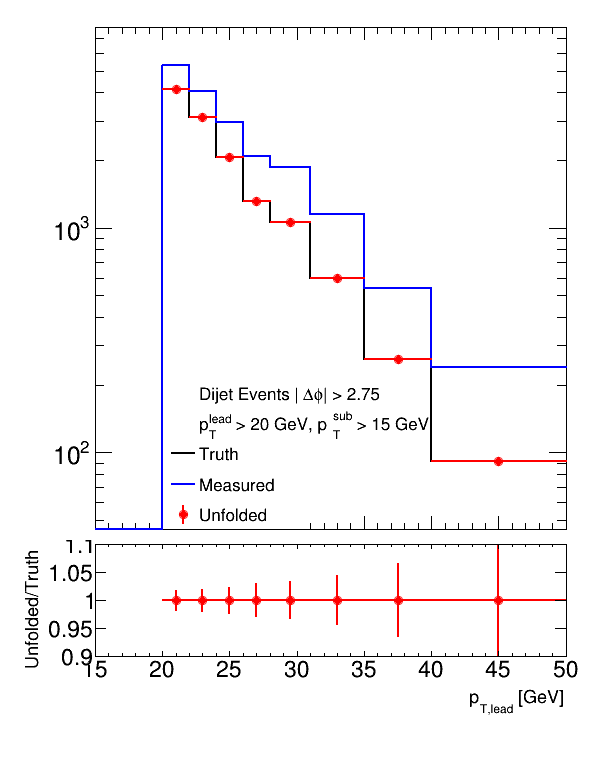

In [6]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

h_truth.SetLineColor(1)
h_reco.SetLineColor(2)
h_meas.SetLineColor(4)
h_truth.SetMarkerColor(1)
h_reco.SetMarkerColor(2)
h_meas.SetMarkerColor(4)
h_truth.SetStats(0)
h_meas.SetStats(0)
h_reco.SetStats(0)
h_truth.GetXaxis().SetLabelSize(0)
h_meas.GetXaxis().SetLabelSize(0)
h_reco.GetXaxis().SetLabelSize(0)

h_truth.Draw()
h_meas.Draw('same')
h_reco.Draw('same')

# Add legend
leg = ROOT.TLegend(.28, .02, .5, .3)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry("","p_{T}^{lead} > 20 GeV, p_{T}^{sub} > 15 GeV","")
leg.AddEntry(h_truth,"Truth","l")
leg.AddEntry(h_meas,"Measured","l")
leg.AddEntry(h_reco,"Unfolded","pe")
leg.Draw()
leg.SetTextSize(0.035)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
ratio1 = h_reco.Clone("ratio1")
ratio1.Divide(h_truth)

ratio1.GetYaxis().SetTitle("Unfolded/Truth")
ratio1.GetYaxis().SetNdivisions(208)
ratio1.GetYaxis().SetRangeUser(0.9,1.1)
ratio1.GetYaxis().SetTitleSize(20)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(2)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("p_{T,lead} [GeV]")
ratio1.GetXaxis().SetTitleSize(20)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)

# Draw ratio plots
ratio1.Draw("ep")

# Update canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_full_unfold.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/h_half_unfold.png has been created


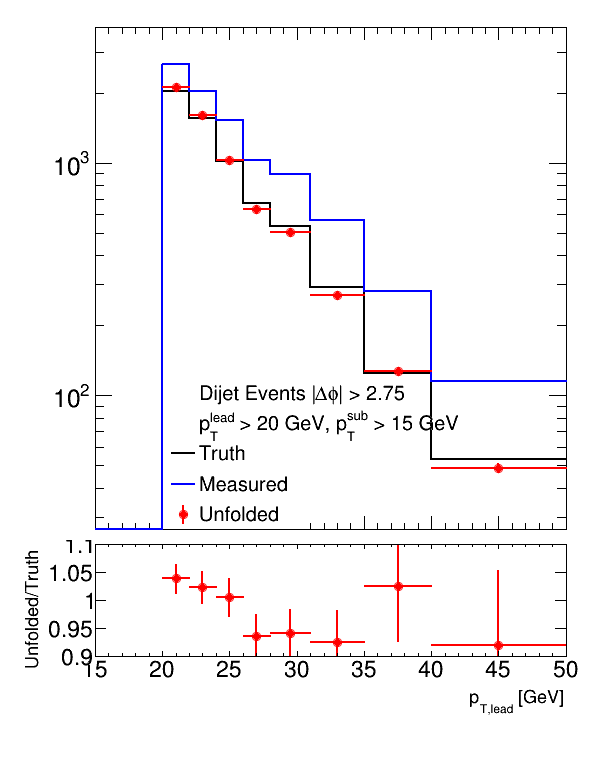

In [7]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

h1_truth.SetLineColor(1)
h1_reco.SetLineColor(2)
h1_meas.SetLineColor(4)
h1_truth.SetMarkerColor(1)
h1_reco.SetMarkerColor(2)
h1_meas.SetMarkerColor(4)
h1_truth.SetStats(0)
h1_meas.SetStats(0)
h1_reco.SetStats(0)
h1_truth.GetXaxis().SetLabelSize(0)
h1_meas.GetXaxis().SetLabelSize(0)
h1_reco.GetXaxis().SetLabelSize(0)

h1_truth.Draw()
h1_meas.Draw('same')
h1_reco.Draw('same')

# Add legend
leg = ROOT.TLegend(.28, .02, .5, .3)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry("","p_{T}^{lead} > 20 GeV, p_{T}^{sub} > 15 GeV","")
leg.AddEntry(h_truth,"Truth","l")
leg.AddEntry(h_meas,"Measured","l")
leg.AddEntry(h_reco,"Unfolded","pe")
leg.Draw()
leg.SetTextSize(0.04)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
ratio1 = h1_reco.Clone("ratio1")
ratio1.Divide(h1_truth)

ratio1.GetYaxis().SetTitle("Unfolded/Truth")
ratio1.GetYaxis().SetNdivisions(204)
ratio1.GetYaxis().SetRangeUser(0.9,1.1)
ratio1.GetYaxis().SetTitleSize(20)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(2)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("p_{T,lead} [GeV]")
ratio1.GetXaxis().SetTitleSize(20)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)

# Draw ratio plots
ratio1.Draw("ep")

# Update canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_half_unfold.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/dijet_leadjet_jes.png has been created


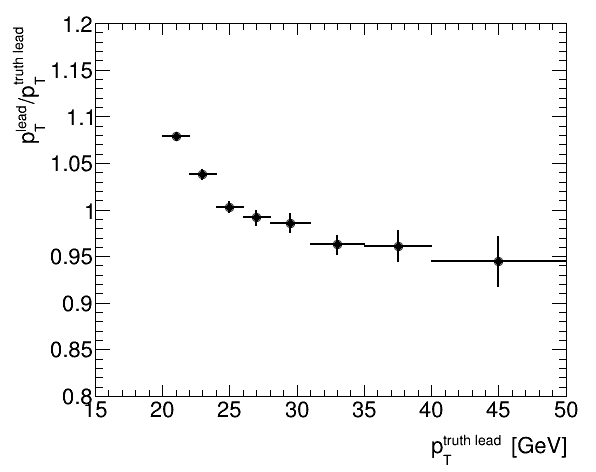

In [8]:
canvas = ROOT.TCanvas("canvas", "", 600, 500)
h_jes.GetYaxis().SetTitle("p_{T}^{lead}/p_{T}^{truth lead}")
h_jes.GetXaxis().SetTitle("p_{T}^{truth lead} [GeV]")
h_jes.GetYaxis().SetRangeUser(0.8,1.2)
h_jes.GetXaxis().SetRangeUser(15,45)
h_jes.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/dijet_leadjet_jes.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/h_inverse_full_unfold.png has been created


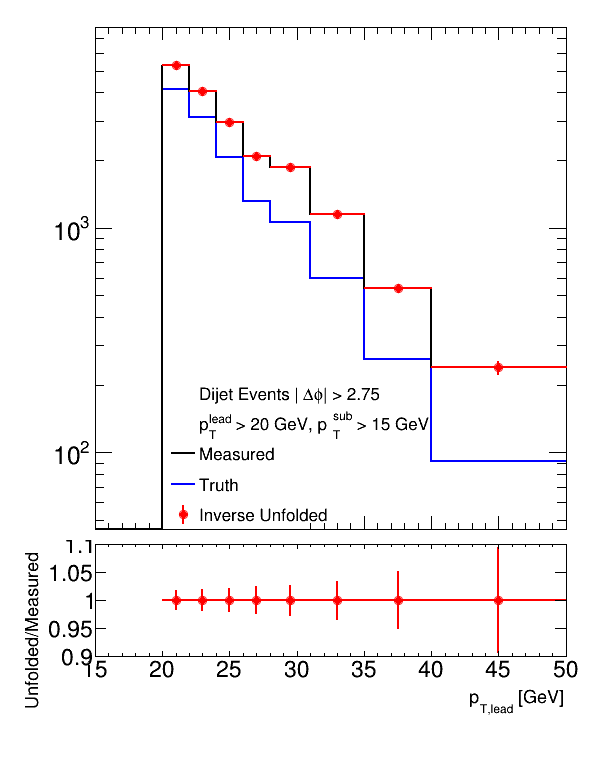

In [15]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

h2_truth.SetLineColor(1)
h2_reco.SetLineColor(2)
h2_meas.SetLineColor(4)
h2_truth.SetMarkerColor(1)
h2_reco.SetMarkerColor(2)
h2_meas.SetMarkerColor(4)
h2_truth.SetStats(0)
h2_meas.SetStats(0)
h2_reco.SetStats(0)
h2_truth.GetXaxis().SetLabelSize(0)
h2_meas.GetXaxis().SetLabelSize(0)
h2_reco.GetXaxis().SetLabelSize(0)

h2_meas.Draw()
h2_truth.Draw('same')
h2_reco.Draw('same')

# Add legend
leg = ROOT.TLegend(.28, .02, .5, .3)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry("","p_{T}^{lead} > 20 GeV, p_{T}^{sub} > 15 GeV","")
leg.AddEntry(h2_truth,"Measured","l")
leg.AddEntry(h2_meas,"Truth","l")
leg.AddEntry(h2_reco,"Inverse Unfolded","pe")
leg.Draw()
leg.SetTextSize(0.035)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
ratio1 = h2_reco.Clone("ratio1")
ratio1.Divide(h2_truth)

ratio1.GetYaxis().SetTitle("Unfolded/Measured")
ratio1.GetYaxis().SetNdivisions(208)
ratio1.GetYaxis().SetRangeUser(0.9,1.1)
ratio1.GetYaxis().SetTitleSize(20)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(2)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("p_{T,lead} [GeV]")
ratio1.GetXaxis().SetTitleSize(20)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)

# Draw ratio plots
ratio1.Draw("ep")

# Update canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_inverse_full_unfold.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/h_inverse_half_unfold.png has been created


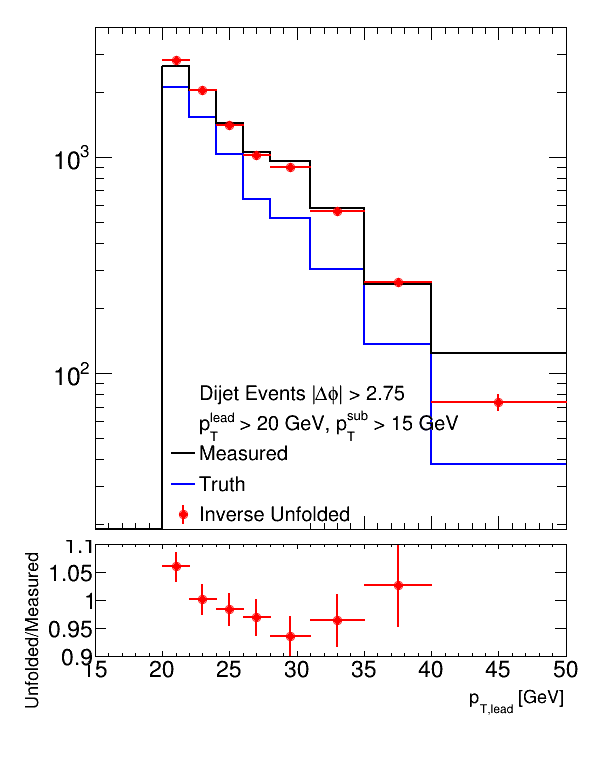

In [14]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

h3_truth.SetLineColor(1)
h3_reco.SetLineColor(2)
h3_meas.SetLineColor(4)
h3_truth.SetMarkerColor(1)
h3_reco.SetMarkerColor(2)
h3_meas.SetMarkerColor(4)
h3_truth.SetStats(0)
h3_meas.SetStats(0)
h3_reco.SetStats(0)
h3_truth.GetXaxis().SetLabelSize(0)
h3_meas.GetXaxis().SetLabelSize(0)
h3_reco.GetXaxis().SetLabelSize(0)

h3_meas.Draw()
h3_truth.Draw('same')
h3_reco.Draw('same')

# Add legend
leg = ROOT.TLegend(.28, .02, .5, .3)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry("","p_{T}^{lead} > 20 GeV, p_{T}^{sub} > 15 GeV","")
leg.AddEntry(h3_truth,"Measured","l")
leg.AddEntry(h3_meas,"Truth","l")
leg.AddEntry(h3_reco,"Inverse Unfolded","pe")
leg.Draw()
leg.SetTextSize(0.04)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
ratio1 = h3_reco.Clone("ratio1")
ratio1.Divide(h3_truth)

ratio1.GetYaxis().SetTitle("Unfolded/Measured")
ratio1.GetYaxis().SetNdivisions(204)
ratio1.GetYaxis().SetRangeUser(0.9,1.1)
ratio1.GetYaxis().SetTitleSize(20)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(2)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("p_{T,lead} [GeV]")
ratio1.GetXaxis().SetTitleSize(20)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)

# Draw ratio plots
ratio1.Draw("ep")

# Update canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_inverse_half_unfold.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_14/dijet_leadjet_inverse_jes.png has been created


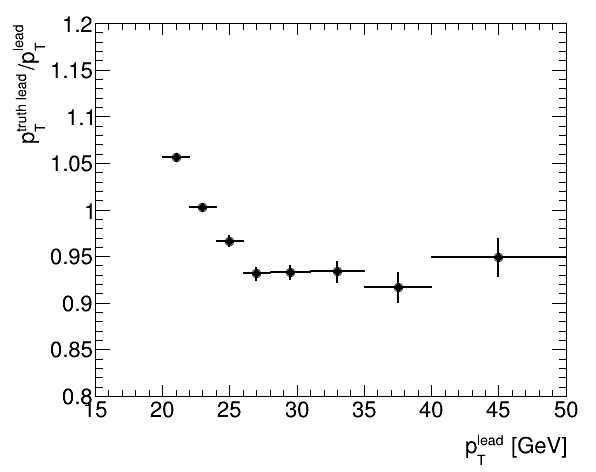

In [13]:
canvas = ROOT.TCanvas("canvas", "", 600, 500)
h_inverse_jes.GetYaxis().SetTitle("p_{T}^{truth lead}/p_{T}^{lead}")
h_inverse_jes.GetXaxis().SetTitle("p_{T}^{lead} [GeV]")
h_inverse_jes.GetYaxis().SetRangeUser(0.8,1.2)
h_inverse_jes.GetXaxis().SetRangeUser(15,45)
h_inverse_jes.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/dijet_leadjet_inverse_jes.png")